In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Twitter API credentials
key = "Y6e6vo4pw6sX2o3PtZhJQPNxB"
secretKey = "haYmIktsZbpu9fswSwKL7kxGQqstAi1vatGk9kMcIlBrdF7kxT"
token = "1324898678767824897-NDRINyeAuI6f64KsWwjDTx1nodRKBA"
secretToken = "UtS9eWfaRDKZti6L5wlPm661AYR7iORQTvr2HYXrdaCYW"

In [4]:
# log in and authenticate your twitter API
authenticate = tweepy.OAuthHandler(key, secretKey)
authenticate.set_access_token(token, secretToken)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [70]:
bidenPosts = api.user_timeline(screen_name = "JoeBiden", count=150, lang='en', tweet_mode='extended')
dfB = pd.DataFrame([tweet.full_text for tweet in bidenPosts], columns=['Tweets'])

#trumpPosts = api.user_timeline(screen_name = "realDonaldTrump", count=150, lang='en', tweet_mode='extended')
#dfT = pd.DataFrame([tweet.full_text for tweet in trumpPosts], columns=['Tweets'])

dfT.head()
#print("\n")
dfB.head()

,Tweets
0,"Today, @KamalaHarris and I met with some of ou..."
1,I’m keeping in my prayers all of our friends a...
2,RT @Transition46: Our White House senior staff...
3,Americans want us to cooperate. They want us t...
4,"When we build back better, we will do so with ..."


In [67]:
# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) # Removing '#' hash tag
  text = re.sub('RT[\s]+', '', text) # Removing RT
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  return text


#dfT["Tweets"] = dfT["Tweets"].apply(cleanTxt)
dfB["Tweets"] = dfB["Tweets"].apply(cleanTxt)

dfT
print("\n")
dfB

,Tweets
0,"Today, and I met with some of our country's m..."
1,I’m keeping in my prayers all of our friends a...
2,46: Our White House senior staff is composed o...
3,Americans want us to cooperate. They want us t...
4,"When we build back better, we will do so with ..."
...,...
145,"I’m Joe Biden, and I’m asking for your vote.\n\n"
146,I’ve said it many times: I’m more optimistic a...
147,Young people have the power to own the outcome...
148,": Your vote is your voice, and your voice is y..."


In [71]:
dfT["Tweets"] = dfT["Tweets"].apply(cleanTxt)
dfT

,Tweets
0,THEY WOULD’NT LET REPUBLICAN POLL WATCHERS INT...


In [51]:
#create function to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create new columns
dfT['Subjectivity'] = dfT['Tweets'].apply(getSubjectivity)
dfB['Subjectivity'] = dfB['Tweets'].apply(getSubjectivity)
dfT['Polarity'] = dfT['Tweets'].apply(getPolarity)
dfB['Polarity'] = dfB['Tweets'].apply(getPolarity)

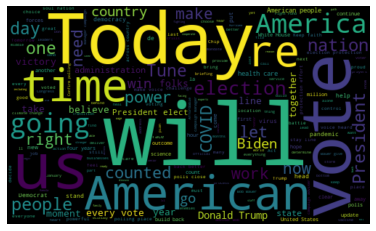

In [46]:
# plot wordcloud
trumpWords = ' '.join([twts for twts in dfT['Tweets']])
bidenWords = ' '.join([twts for twts in dfB['Tweets']])
wordCloudT = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(trumpWords)
wordCloudB = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(bidenWords)

plt.imshow(wordCloudB, interpolation='bilinear')
plt.axis("off")
plt.show()

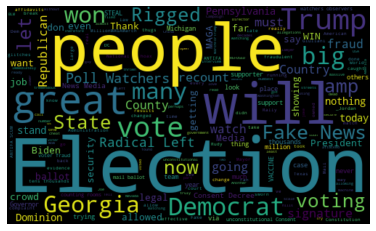

In [52]:
plt.imshow(wordCloudT, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
#create function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return "Neutral"
    else:
        return 'Positive'
    

dfT["Analysis"] = dfT["Polarity"].apply(getAnalysis)
dfB["Analysis"] = dfB["Polarity"].apply(getAnalysis)

In [57]:
#print all postive tweets
sortedDFB = dfB.sort_values(by=['Polarity'])
for i in range(0, sortedDFB.shape[0]):
    if(sortedDFB['Analysis'][i] == 'Positive'):
        #print(str(j)+ ')' + sortedDFB['Tweets'][i])
        #print()
        j+=1


In [56]:
j=1
sortedDFT = dfT.sort_values(by=['Polarity'])
for i in range(0, sortedDFT.shape[0]):
    if(sortedDFT['Analysis'][i] == 'Positive'):
        #print(str(j)+ ')' + sortedDFT['Tweets'][i])
        #print()
        j+=1

In [60]:
sortedDFB = dfB.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDFB.shape[0]):
    if(sortedDFB['Analysis'][i] == 'Negative'):
        #print(str(j) + ')'+ sortedDFB['Tweets'][i])
        #print()
        j+=1

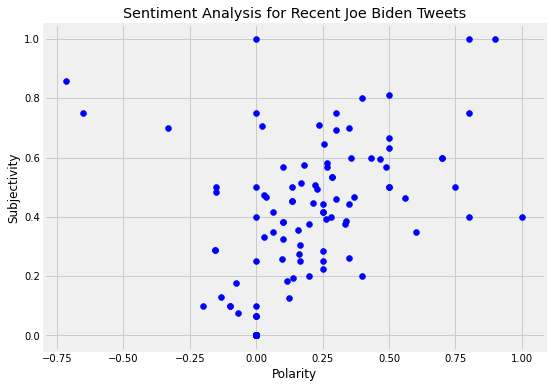

In [63]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, dfB.shape[0]):
    plt.scatter(dfB['Polarity'][i], dfB['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis for Recent Joe Biden Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

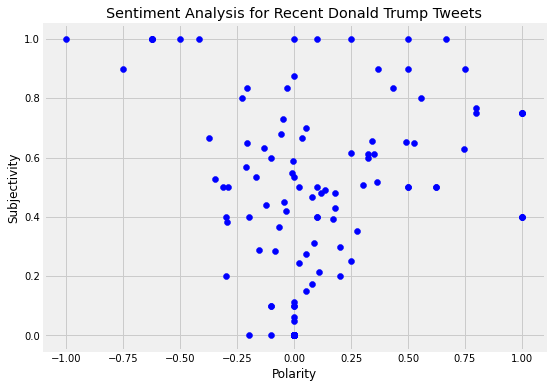

In [64]:
plt.figure(figsize=(8,6))
for i in range(0, dfT.shape[0]):
    plt.scatter(dfT['Polarity'][i], dfT['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis for Recent Donald Trump Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [79]:
text_query = 'Trump'
count = 1000
try:
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.search,q=text_query).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

tweets_df[2]

0      RT @DavidShafer: One of our monitors discovere...
1      RT @Robin_Blue19: Why are Evangelicals upset t...
2      Texas Voter Shares Her Story of Grappling with...
3      RT @duty2warn: Biden has a coronavirus team. T...
4      @MSNBC @MaddowBlog Great news today !  The Tru...
                             ...                        
995    @AggadanCool @realDonaldTrump Like I said, Tru...
996    RT @washingtonpost: Opinion: Trump will leave ...
997    RT @BolsoTrumpRaiz: Presidente Trump acabou de...
998    @SkyNews Who is laughing at trump know. Injest...
999    @KamalaHarris @taryder @JoeBiden Correct, it's...
Name: 2, Length: 1000, dtype: object

In [81]:
tweets_df[2] = tweets_df[2].apply(cleanTxt)
tweets_df[2]

0      : One of our monitors discovered a 9,626 vote ...
1      _Blue19: Why are Evangelicals upset that Trump...
2      Texas Voter Shares Her Story of Grappling with...
3      2warn: Biden has a coronavirus team. Trump's t...
4        Great news today !  The Trump administration...
                             ...                        
995      Like I said, Trump has every right to contes...
996    : Opinion: Trump will leave office soon. But w...
997    : Presidente Trump acabou de postar uma mensag...
998            Who is laughing at trump know. Injest it.
999       Correct, it's about you being a control fre...
Name: 2, Length: 1000, dtype: object

In [82]:
tweets_df["Subjectivity"] = tweets_df[2].apply(getSubjectivity)
tweets_df["Polarity"] = tweets_df[2].apply(getPolarity)
tweets_df["Analysis"] = tweets_df["Polarity"].apply(getAnalysis)


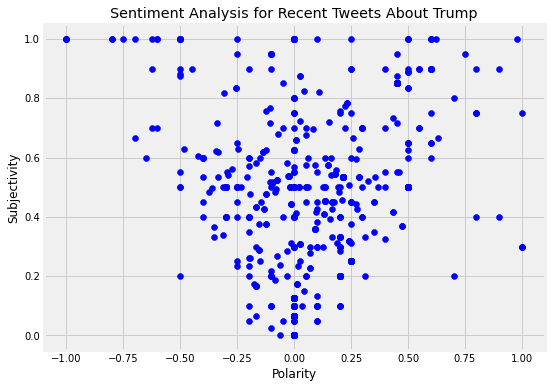

In [83]:
plt.figure(figsize=(8,6))
for i in range(0, tweets_df[2].shape[0]):
    plt.scatter(tweets_df['Polarity'][i], tweets_df['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis from 1000 Recent Tweets About Trump')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [84]:
text_query = 'Biden'
count = 1000
try:
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.search,q=text_query).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 aboutBiden_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

aboutBiden_df[2]

0      RT @itsJeffTiedrich: Trump now has more failed...
1      RT @mmurraypolitics: Forget Russia’s interfere...
2      RT @Reuters: The Nov. 13-17 opinion poll showe...
3       https://t.co/GHcTzaNfCv\nhttps://t.co/hqOSVVwJze
4      RT @katiemcque: Saudi Arabia's Energy Minister...
                             ...                        
995    RT @kylegriffin1: Joe Biden has hit 51% of the...
996    RT @nowthisnews: The longer President Trump re...
997    "It would be nonsensical to lift nuclear-relat...
998    @realDonaldTrump Biden says you will  "enlight...
999    @SheilaMMSG Como el Trump no va a seguir en la...
Name: 2, Length: 1000, dtype: object

In [87]:
aboutBiden_df[2] = aboutBiden_df[2].apply(cleanTxt)
aboutBiden_df[2]

0      : Trump now has more failed lawsuits than Hunt...
1      : Forget Russia’s interference in '16. Or Trum...
2      : The Nov. 13-17 opinion poll showed that Trum...
3                                                     \n
4      : Saudi Arabia's Energy Minister, Prince Abdul...
                             ...                        
995    1: Joe Biden has hit 51% of the popular vote. ...
996    : The longer President Trump refuses to conced...
997    "It would be nonsensical to lift nuclear-relat...
998      Biden says you will  "enlightened"\nBothers me.
999     Como el Trump no va a seguir en la presidenci...
Name: 2, Length: 1000, dtype: object

In [90]:
aboutBiden_df["Subjectivity"] = aboutBiden_df[2].apply(getSubjectivity)
aboutBiden_df["Polarity"] = aboutBiden_df[2].apply(getPolarity)
aboutBiden_df["Analysis"] = aboutBiden_df["Polarity"].apply(getAnalysis)

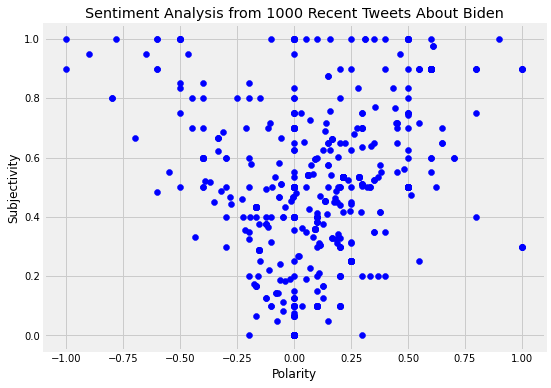

In [92]:
plt.figure(figsize=(8,6))
for i in range(0, aboutBiden_df[2].shape[0]):
    plt.scatter(aboutBiden_df['Polarity'][i], aboutBiden_df['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis from 1000 Recent Tweets About Biden')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()